# **Project brief**

### **Objectif**
>Predict Salary regarding years experience

### **Model**
>Simple Linear Regression

### **Metrics**
- R2
- Mean absolute error
- Median absolute error

# **Pachages and modules import**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Import data**

In [4]:
salary_df = pd.read_csv("Salary_Data.csv")
salary_df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

# **Data set analysis**

In [5]:
df = salary_df.copy()

In [7]:
print("Rows :",df.shape[0])
print("Columns :",df.shape[1])

Rows : 30
Columns : 2


In [5]:
# NaN analysis
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

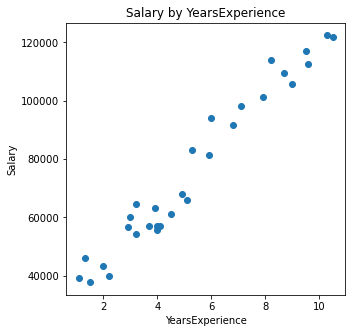

In [6]:
# Define x & y
x = df.iloc[:,0]
y = df.iloc[:,1]

# Plot x & y
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title("Salary by YearsExperience")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


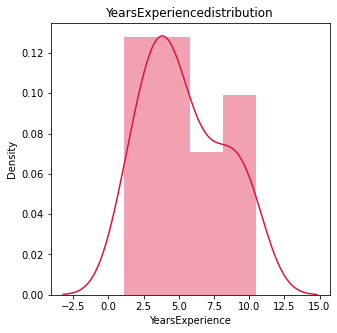

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


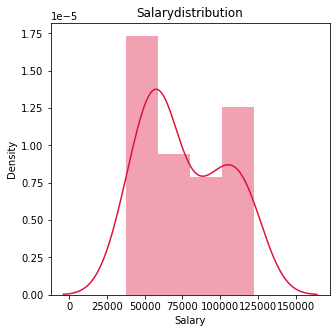

In [7]:
# this funciton plot columns distribution
def plot_displot (df, col) :
    plt.figure(figsize=(5,5))
    sns.distplot(df[col], color="crimson")
    plt.title(col + "distribution")
    plt.show()

plot_displot (df, "YearsExperience") # YearsExperience columns distribution
plot_displot (df, "Salary") # Salary columns distribution

# **Variables correlation**

<AxesSubplot:>

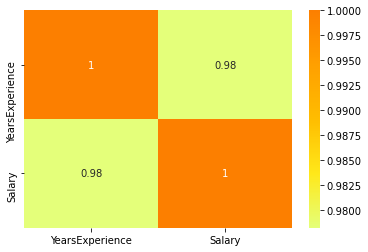

In [8]:
sns.heatmap(df.corr(), annot=True, cmap="Wistia")

# **Model fit and optimization**

In [10]:
# train set and test set split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2, shuffle=True)

# train set reshape
x_train = np.array(x_train).reshape(x_train.shape[0], 1)
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

# test set reshape
x_test = np.array(x_test).reshape(x_test.shape[0], 1)
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

# print shapes
print("train feature shape", x_train.shape)
print("train target shape", y_train.shape)

print("\ntest feature shape", x_test.shape)
print("test target shape", y_test.shape)

train feature shape (24, 1)
train target shape (24, 1)

test feature shape (6, 1)
test target shape (6, 1)


In [11]:
# model initalisation
model = LinearRegression()

# model train
model.fit(x_train, y_train)

# get coef (a) & intercept (b)
a = round(model.coef_[0][0],2)
b = round(model.intercept_[0],2)
print(f"The final model function is : {a} X + {b}")

The final model function is : 9437.9 X + 26056.29


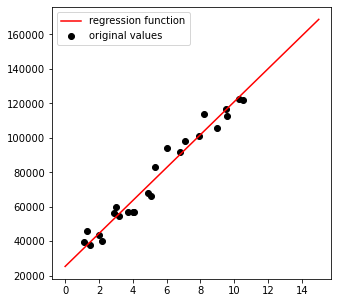

In [12]:
# linear function
def linear_regression_funtion (p) :
    return (9556.68 * p) + 25390.73

# function plot
line_x = [0, 15] # [x1, x2]
line_y = [linear_regression_funtion (0), linear_regression_funtion (15)] # [f(x1), f(x2)]

plt.figure(figsize = (5,5))
plt.scatter(x_train, y_train, c = 'black', label ='original values')
plt.plot(line_x, line_y, c = 'red', label ='regression function')
plt.legend()
plt.show()

# **Model application**

In [43]:
# calculate predictions
y_pred = model.predict(x_test)

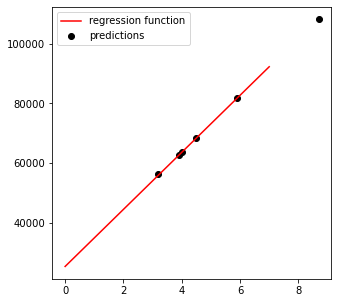

In [16]:
# plot predictions
line_x_pred = [0, 7] # [x1, x2]
line_y_pred = [linear_regression_funtion (0), linear_regression_funtion (7)] # [f(x1), f(x2)]

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_pred, c = 'black', label ='predictions')
plt.plot(line_x_pred, line_y_pred, c = 'red', label ='regression function')
plt.legend()
plt.show()

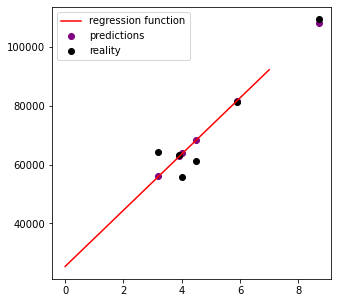

In [17]:
# plot predictions VS real values
line_x_pred = [0, 7] # [x1, x2]
line_y_pred = [linear_regression_funtion (0), linear_regression_funtion (7)] # [f(x1), f(x2)]

plt.figure(figsize = (5,5))
plt.plot(line_x_pred, line_y_pred, c = 'red', label ='regression function')
plt.scatter(x_test, y_pred, c = 'purple', label = "predictions")
plt.scatter(x_test, y_test, c = 'black', label = "reality")
plt.legend()
plt.show()

# **Model evaluation**

In [50]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score

R2 = round(((r2_score(y_test, y_pred)) * 100),2)
Mean_abs_erro = round(mean_absolute_error(y_test, y_pred),2)
Median_abs_error = round(median_absolute_error(y_test, y_pred),2)

print(f"Our predictions fit at {R2} %") # Rate of matching values of the set on the regression line
print(f"The average error is (Mean absolute error) = {Mean_abs_erro} $") # The average error
print(f"The median error is (Median absolute error) = {Median_abs_error} $") # The median error

Our predictions fit at 90.6 %
The average error is (Mean absolute error) = 4268.82 $
The median error is (Median absolute error) = 4340.4 $


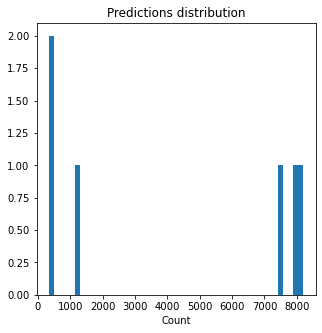

In [51]:
# errors distribution

err_hist = np.abs(y_test - y_pred)

plt.figure(figsize=(5,5))
plt.title("Predictions distribution")
plt.hist(err_hist, bins = 50)
plt.xlabel("Predictions")
plt.xlabel("Count")
plt.show()